# LAHMC Paper results

In [1]:
include("lahmc.jl")
include("run_lahmc.jl")

sample_loop (generic function with 1 method)

# Rough Well

In [2]:
n_samples = 10000
n_chains = 10
epsilon = 1
L = 10
beta = 0.1
n_param = 2

rw = Rough_Well(2, 100, 4)

function U(X)
    return U_rough_well(X, rw)
end

function dU(X)
    return dU_rough_well(X, rw)
end
function init_q()
    return init_rough_well(rw)
end

init_q (generic function with 1 method)

Average acceptance rate: 0.7104010401040105
Average transition rates: L1: 0.5570957095709571 L2: 0.09865986598659866 L3: 0.03633363336333633 L4: 0.018311831183118313 F: 0.2895989598959896
Average acceptance rate: 0.5534453445344536
Average transition rates: L1: 0.5534453445344535 F: 0.44655465546554657


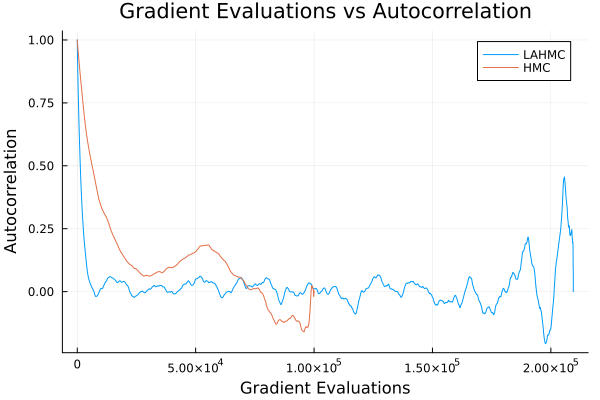

In [3]:
lahmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 4, beta, n_param, n_samples)
autocorrelation_lahmc = calculate_looped_autocorrelation(lahmc_samples)

gradient_evaluations_lahmc = LinRange(0, grad_count/n_chains, length(autocorrelation_lahmc))

plt_lahmc_ac = plot(gradient_evaluations_lahmc, autocorrelation_lahmc, title="Gradient Evaluations vs Autocorrelation", xlabel="Gradient Evaluations", ylabel="Autocorrelation", label="LAHMC")

hmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 1, beta, n_param, n_samples)
autocorrelation_hmc = calculate_looped_autocorrelation(hmc_samples)

gradient_evaluations_hmc = LinRange(0, grad_count/n_chains, length(autocorrelation_hmc))

plt_hmc_ac = plot!(gradient_evaluations_hmc, autocorrelation_hmc, label="HMC")

display(plt_lahmc_ac)

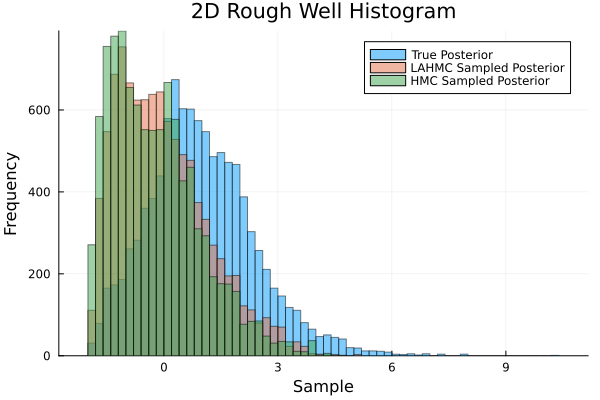

In [4]:
plot_histograms(U, init_q, lahmc_samples, n_samples, "2D Rough Well Histogram"; hmc_samples=hmc_samples)

# 2D ill-conditioned Gaussian

In [5]:
n_samples = 10000
n_chains = 10
epsilon = 1
L = 10
beta = 0.1
n_param = 2

gauss_2d = Gaussian(2, 0.6)

function U(X)
    return U_gaussian(X, gauss_2d)
end

function dU(X)
    return dU_gaussian(X, gauss_2d)
end
function init_q()
    return init_gaussian(gauss_2d)
end

init_q (generic function with 1 method)

Average acceptance rate: 0.9963896389638964
Average transition rates: L1: 0.9143114311431143 L2: 0.04057405740574058 L3: 0.041384138413841386 L4: 0.00012001200120012002 F: 0.0036103610361036104
Average acceptance rate: 0.9138313831383137
Average transition rates: L1: 0.9138313831383138 F: 0.08616861686168617


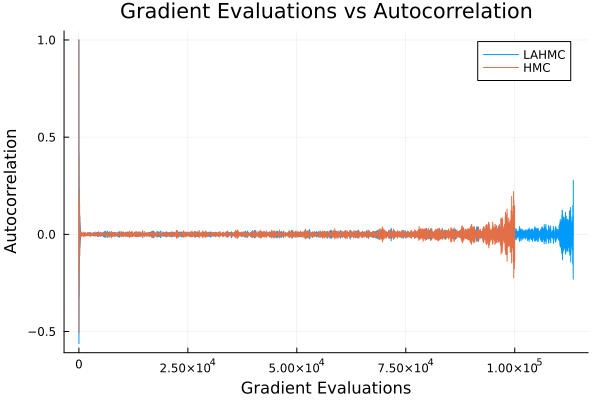

In [6]:
lahmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 4, beta, n_param, n_samples)
autocorrelation_lahmc = calculate_looped_autocorrelation(lahmc_samples)

gradient_evaluations_lahmc = LinRange(0, grad_count/n_chains, length(autocorrelation_lahmc))

plt_lahmc_ac = plot(gradient_evaluations_lahmc, autocorrelation_lahmc, title="Gradient Evaluations vs Autocorrelation", xlabel="Gradient Evaluations", ylabel="Autocorrelation", label="LAHMC")

hmc_samples, grad_count = sample_loop(n_chains, U, dU, init_q, epsilon, L, 1, beta, n_param, n_samples)
autocorrelation_hmc = calculate_looped_autocorrelation(hmc_samples)

gradient_evaluations_hmc = LinRange(0, grad_count/n_chains, length(autocorrelation_hmc))

plt_hmc_ac = plot!(gradient_evaluations_hmc, autocorrelation_hmc, label="HMC")

display(plt_lahmc_ac)


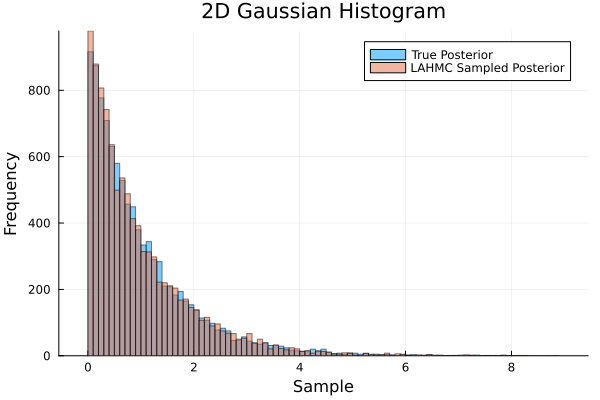

In [7]:
plot_histograms(U, init_q, lahmc_samples, n_samples, "2D Gaussian Histogram")